In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd

In [2]:
data_lebel=pd.read_csv('/kaggle/input/soft-computing-even-id-dataset/training-a.csv')

In [3]:
data_lebel.head()

,filename,original filename,scanid,digit,database name original,contributing team,database name
0,a00000.png,Scan_58_digit_5_num_8.png,58,5,BHDDB,Buet_Broncos,training-a
1,a00001.png,Scan_73_digit_3_num_5.png,73,3,BHDDB,Buet_Broncos,training-a
2,a00002.png,Scan_18_digit_1_num_3.png,18,1,BHDDB,Buet_Broncos,training-a
3,a00003.png,Scan_166_digit_7_num_3.png,166,7,BHDDB,Buet_Broncos,training-a
4,a00004.png,Scan_108_digit_0_num_1.png,108,0,BHDDB,Buet_Broncos,training-a


In [4]:
data_lebel['digit'].unique()

array([5, 3, 1, 7, 0, 4, 9, 8, 2, 6])

In [5]:
data_lebel.iloc[1, 0]

'a00001.png'

In [6]:
data_lebel['digit'].value_counts()

2    1984
6    1983
4    1982
3    1976
0    1975
5    1965
9    1964
1    1963
7    1960
8    1950
Name: digit, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [4]:
import torch
import cv2
import torchvision
from torchvision.transforms import transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import torch.nn.functional as F
from PIL import ImageFile
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import torch.nn as nn
import torch.nn.functional as f
from skimage import io
from torch.utils.data import (
    Dataset,
    DataLoader,
) 
import warnings
warnings.filterwarnings('ignore')
torch.manual_seed(0)
import sys

In [8]:
img = cv2.imread('/kaggle/input/soft-computing-even-id-dataset/training-a/a00000.png')

In [11]:
img.shape

(180, 180, 3)

In [ ]:
img[0]

In [5]:
IMAGE_SIZE = 28 
transform = transforms.Compose([
                                transforms.ToPILImage(),

                                transforms.Grayscale(), 
                                transforms.RandomRotation(20,expand=True), 
                                transforms.Resize(IMAGE_SIZE),  ## image resize
                                transforms.CenterCrop(IMAGE_SIZE),
                                transforms.ToTensor(), ## array converted into torch tensor and then divided by 255 (1.0/255)
                               ])

In [6]:
class digit_Dataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=True):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = cv2.imread(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[index, 3]))

        if self.transform:
            image = self.transform(image)

        return (image, y_label)

In [7]:
dataset =digit_Dataset(
    csv_file="/kaggle/input/soft-computing-even-id-dataset/training-a.csv",
    root_dir="/kaggle/input/soft-computing-even-id-dataset/training-a",
    transform=transform,
)

In [ ]:
len(dataset)

In [8]:
train_set, test_set = torch.utils.data.random_split(dataset, [15702, 4000])
train_loader = DataLoader(dataset=train_set, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=32, shuffle=True)

In [13]:
data_iter = iter(train_loader)
images, labels = data_iter.next()
images.shape

torch.Size([32, 1, 28, 28])

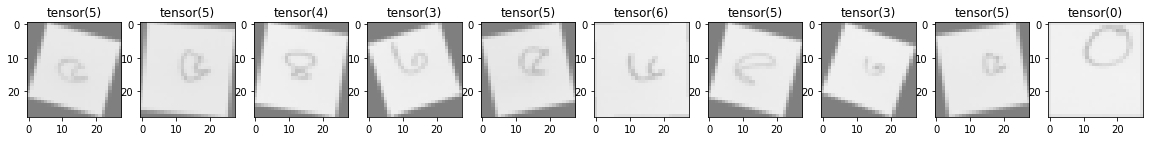

In [14]:
dataiter = iter(train_loader)
images, labels = dataiter.next() 
plt.subplots(figsize=(20, 32))
for i in range(10):
    plt.subplot(10/2, 10,i+1)
    img = images[i].detach().numpy().transpose((1, 2, 0))
    mean = np.array([0.5, 0.5, 0.5]) 
    std = np.array([0.5, 0.5, 0.5])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    plt.title(labels[i])
    # print(img.shape)
    plt.imshow(img)
plt.show()

In [9]:
class Net(nn.Module): # Module is library package
    
    def __init__(self):
        super().__init__()
        
        self.fc1=nn.Linear(28 * 28, 784)  #flatten the image 
        self.fc2=nn.Linear(784,611)        
        self.fc3=nn.Linear(611,510)
        self.fc4=nn.Linear(510,10)
        
    def forward(self,x): # pass the data
        
        x = x.view(-1, 28 * 28) 
        x=f.relu(self.fc1(x))
        x=f.relu(self.fc2(x))
        x=f.relu(self.fc3(x))
        
        x=self.fc4(x)
        return x
               

net=Net()
print(net)
net.cuda()

Net(
  (fc1): Linear(in_features=784, out_features=784, bias=True)
  (fc2): Linear(in_features=784, out_features=611, bias=True)
  (fc3): Linear(in_features=611, out_features=510, bias=True)
  (fc4): Linear(in_features=510, out_features=10, bias=True)
)


Net(
  (fc1): Linear(in_features=784, out_features=784, bias=True)
  (fc2): Linear(in_features=784, out_features=611, bias=True)
  (fc3): Linear(in_features=611, out_features=510, bias=True)
  (fc4): Linear(in_features=510, out_features=10, bias=True)
)

In [ ]:
summary( net, input_size=(3, 32, 32))

In [16]:
optimizer =  optim.SGD(net.parameters(), lr=0.01)
 
criterion = torch.nn.CrossEntropyLoss()

In [13]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [10]:
Path='../input/weight2/exp2.pth'

In [11]:
net.load_state_dict(torch.load(Path))

<All keys matched successfully>

In [14]:
all_tranning_loss=[]
all_validation_loss=[]
all_tranning_accuracy=[]
all_validation_accuracy=[]

In [18]:
Path='./'

In [17]:
steps = 0
num_epochs=200

for epoch in range(162,num_epochs):
    net.train()
    phase = 'tranning'
    print('Epoch {}/{}'.format(epoch, num_epochs - 1))
    print('-' * 10)
    running_loss = 0.0
    running_corrects = 0
    for i,(inputs, labels) in enumerate(train_loader):
                
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        # running_loss += loss.item() * inputs.size(0)
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)

        steps += 1
        
    
    steps = 0
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = running_corrects.double().item() /len(train_loader.dataset)
    all_tranning_loss.append(loss.item())
    all_tranning_accuracy.append(epoch_acc)


    print("\n")
    print("----------------------------Tranning Summary----------------------")
    print('{} Tranning Avg. Loss: {:.4f} Tranning Avg. Acc: {:.4f}'.format(
        phase, epoch_loss, epoch_acc))
    print("-"*70)
    print("\n")
 
    net.eval()
    
    with torch.no_grad():
        phase = "validation"
        running_loss = 0.0
        running_corrects = 0
        for i,(inputs, labels) in enumerate(test_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            running_corrects += torch.sum(preds == labels.data)  
            
        epoch_val_loss = running_loss / len(test_loader)
        epoch_val_acc = running_corrects.double().item() /len(test_loader.dataset)
        all_validation_loss.append(epoch_val_loss)
        all_validation_accuracy.append(epoch_val_acc)

        print()
        print("----------------------------Validation Summary-----------------")
        print('{} Validation Avg. Loss: {:.4f} Validation Avg. Acc: {:.4f}'.format(
                    phase, epoch_val_loss, epoch_val_acc))
        print("------------------------------------------------------------")
        
    net.train()

torch.save(net.state_dict(), Path)

Epoch 162/199
----------


----------------------------Tranning Summary----------------------
tranning Tranning Avg. Loss: 0.7557 Tranning Avg. Acc: 0.7489
----------------------------------------------------------------------



----------------------------Validation Summary-----------------
validation Validation Avg. Loss: 1.0437 Validation Avg. Acc: 0.6468
------------------------------------------------------------
Epoch 163/199
----------


----------------------------Tranning Summary----------------------
tranning Tranning Avg. Loss: 0.7539 Tranning Avg. Acc: 0.7489
----------------------------------------------------------------------



----------------------------Validation Summary-----------------
validation Validation Avg. Loss: 1.0220 Validation Avg. Acc: 0.6492
------------------------------------------------------------
Epoch 164/199
----------


----------------------------Tranning Summary----------------------
tranning Tranning Avg. Loss: 0.7605 Tranning Avg. Acc: 0.748

OSError: [Errno 30] Read-only file system: '../input/weight2/exp2.pth'

In [24]:
Path='./exp2.pth'

In [25]:
torch.save(net.state_dict(), Path)

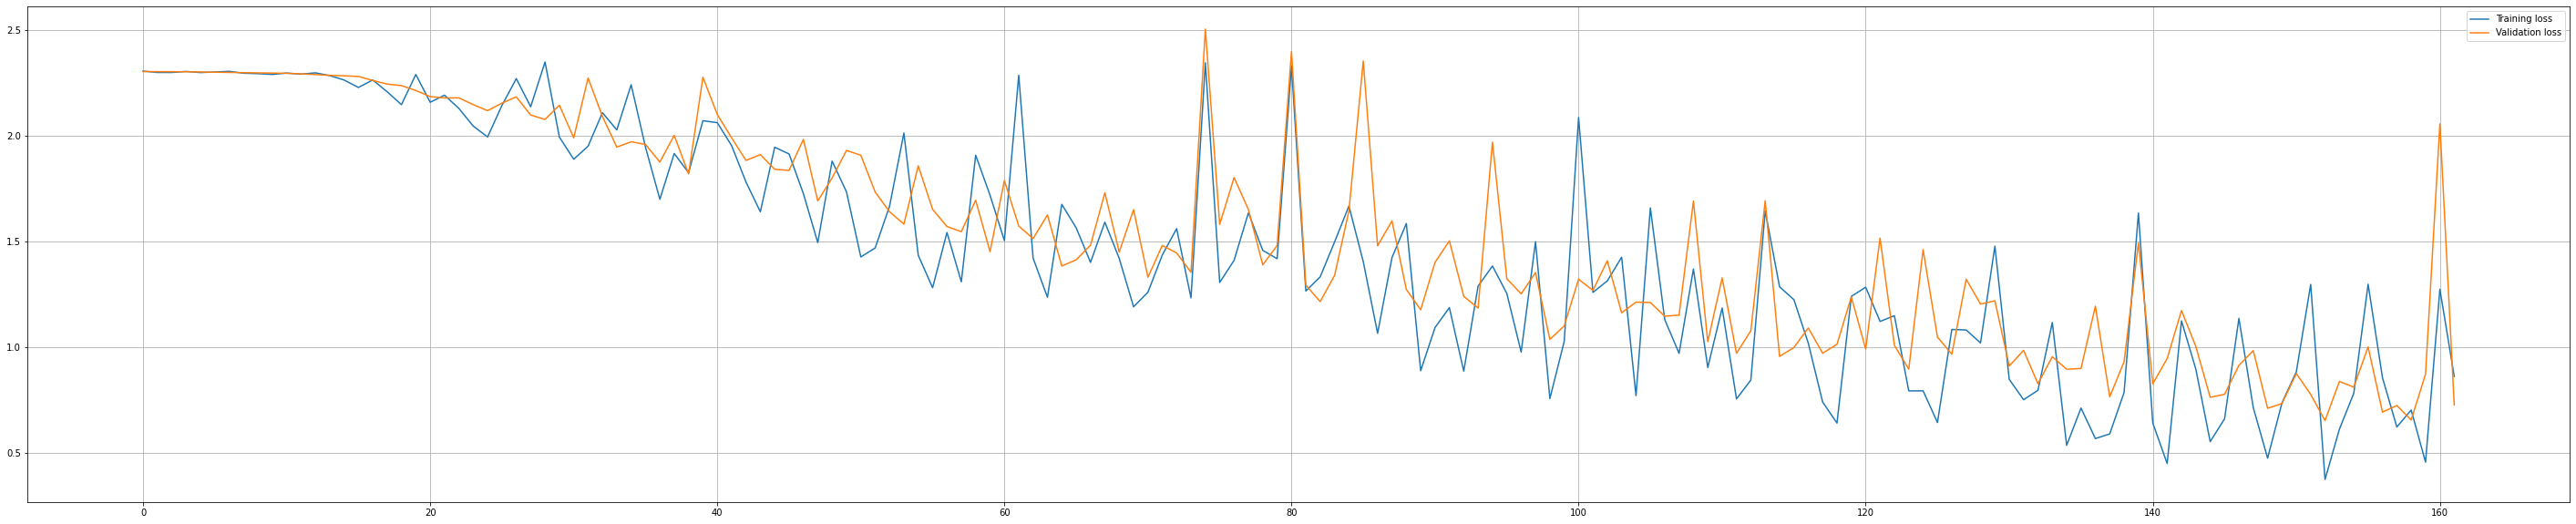

In [41]:
#display stats in graph
plt.figure(figsize=(50, 10))
plt.plot(all_tranning_loss, label='Training loss')
plt.plot(all_validation_loss, label='Validation loss')
plt.legend()
plt.grid()
plt.show()

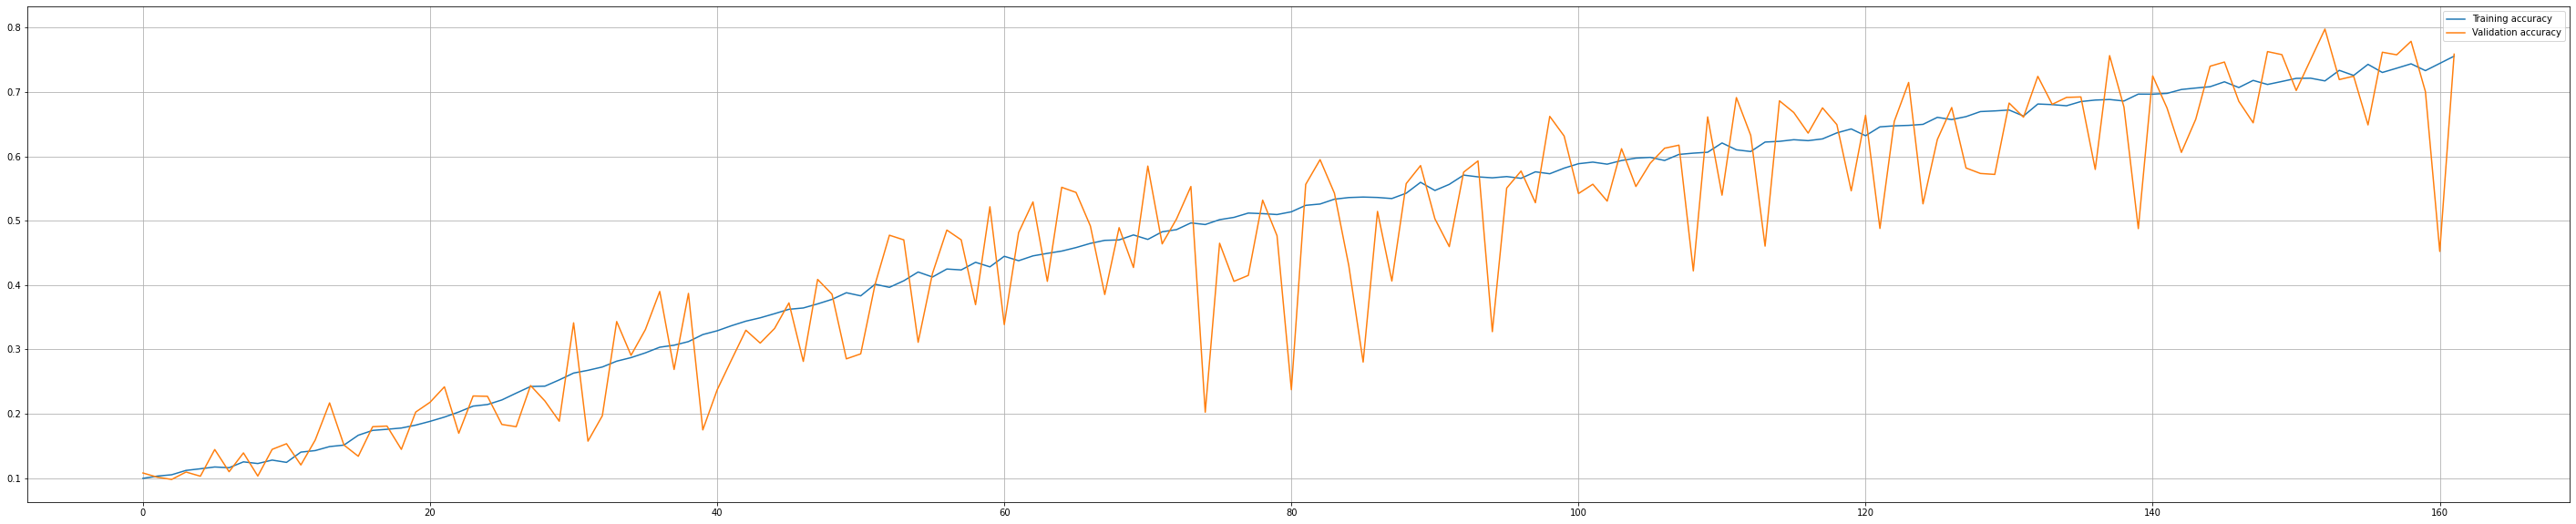

In [42]:
#display stats in graph
plt.figure(figsize=(50, 10))
plt.plot(all_tranning_accuracy, label='Training accuracy')
plt.plot(all_validation_accuracy, label='Validation accuracy')
plt.legend()
plt.grid()
plt.show()

In [26]:
correct=0
total=0
with torch.no_grad():
    for data in test_loader:
        X,y=data
        X, y = X.to(device), y.to(device)
        
        output=net(X)
        for idx, i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                correct+=1
            total+=1
            
print(round(correct/total,3))

0.797


In [27]:
nb_classes = 10

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(test_loader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = net.forward(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

print(confusion_matrix)

tensor([[299.,   7.,  21.,   4.,   5.,   8.,   1.,   8.,   6.,  11.],
        [  7., 155.,  41.,   8.,   1.,  10.,   1.,  17.,   1., 184.],
        [  3.,   2., 367.,   5.,  15.,   3.,   1.,   5.,   1.,  10.],
        [  9.,   1.,   7., 353.,  14.,   3.,   3.,   2.,   0.,  15.],
        [  1.,   0.,   3.,   3., 384.,   6.,   1.,   0.,   0.,   0.],
        [  7.,   1.,   1.,   4.,   4., 356.,   8.,   9.,   0.,   4.],
        [  0.,   1.,   2.,   3.,   0.,  36., 360.,   3.,   1.,   1.],
        [  2.,   1.,   3.,   2.,   1.,  12.,   5., 353.,   1.,   7.],
        [  2.,   7.,  10.,   1.,  11.,   7.,   1.,  18., 299.,  37.],
        [  4.,  22.,  37.,  18.,  13.,  27.,   1.,  14.,  11., 260.]])


Text(0.5, 15.0, 'Predicted label')

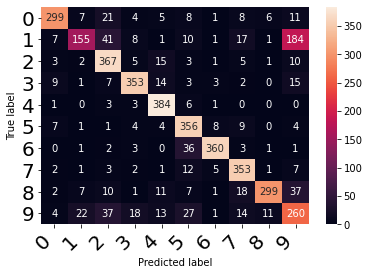

In [28]:
import pandas as pd
import seaborn as sns
class_names = ["0","1","2","3","4","5","6","7","8","9"]
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=20)
plt.ylabel('True label')
plt.xlabel('Predicted label')